Confirm that exposure time sensibly affects the simulated spectra generated using dark/bright sky.

In [1]:
import os
import numpy as np 
# -- astropy --
from astropy.io import fits
from desispec.io import read_spectra
# -- local --
from feasibgs import util as UT
from feasibgs import catalogs as Cat
from feasibgs import forwardmodel as FM

In [9]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Read in GAMA-legacy catalog for the meta data

In [2]:
cata = Cat.GamaLegacy()
gleg = cata.Read()

In [3]:
redshift = gleg['gama-spec']['z_helio']
ngal = len(redshift)
print('%i galaxies total' % ngal)

39832 galaxies total


In [4]:
band_list = ['b', 'r', 'z']

Read in dark sky simulated spectra for galaxy `i_gal`

In [5]:
darkspec_300 = read_spectra(''.join([UT.dat_dir(), 'spectra/', 
                                     'gama_legacy.expSpectra.darksky.seed1.exptime300.faintEmLine.fits']))
darkspec_480 = read_spectra(''.join([UT.dat_dir(), 'spectra/', 
                                     'gama_legacy.expSpectra.darksky.seed1.exptime480.faintEmLine.fits']))
darkspec_1000 = read_spectra(''.join([UT.dat_dir(), 'spectra/', 
                                     'gama_legacy.expSpectra.darksky.seed1.exptime1000.faintEmLine.fits']))

In [7]:
brightspec_300 = read_spectra(''.join([UT.dat_dir(), 'spectra/', 
                                     'gama_legacy.expSpectra.brightsky.seed1.exptime300.faintEmLine.fits']))
brightspec_480 = read_spectra(''.join([UT.dat_dir(), 'spectra/', 
                                     'gama_legacy.expSpectra.brightsky.seed1.exptime480.faintEmLine.fits']))
brightspec_1000 = read_spectra(''.join([UT.dat_dir(), 'spectra/', 
                                     'gama_legacy.expSpectra.brightsky.seed1.exptime1000.faintEmLine.fits']))

In [43]:
for k in darkspec.fibermap.keys(): 
    if not np.array_equal(darkspec.fibermap[k], brightspec.fibermap[k]):
        print('%s' % k )

[-1.71079683  1.13082457  0.72840756 ...  5.14880228  1.50125062
  3.67853141]


(-5.0, 10)

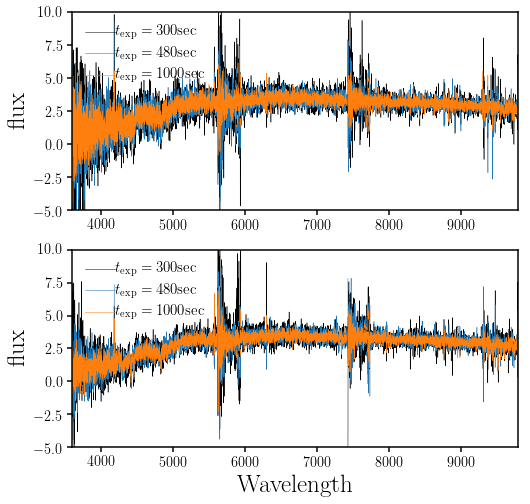

In [17]:
i_gal = 0
print brightspec_300.flux['r'][i_gal].flatten()
fig = plt.figure(figsize=(8,8))
sub = fig.add_subplot(211)
for band in band_list:
    sub.plot(brightspec_300.wave[band], brightspec_300.flux[band][i_gal].flatten(), c='k', lw=0.5,
             label='$t_\mathrm{exp}=300$sec')
    sub.plot(brightspec_480.wave[band], brightspec_480.flux[band][i_gal].flatten(), c='C0', lw=0.5,
             label='$t_\mathrm{exp}=480$sec')
    sub.plot(brightspec_1000.wave[band], brightspec_1000.flux[band][i_gal].flatten(), c='C1', lw=0.5,
             label='$t_\mathrm{exp}=1000$sec')
    if band == 'b': sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size': 15})
sub.set_xlim([3600., 9800.])
sub.set_ylabel('flux', fontsize=25)
sub.set_ylim([-5., 10])
sub = fig.add_subplot(212)
for band in band_list:
    sub.plot(darkspec_300.wave[band], darkspec_300.flux[band][i_gal].flatten(), c='k', lw=0.5, 
             label='$t_\mathrm{exp}=300$sec')
    sub.plot(darkspec_480.wave[band], darkspec_480.flux[band][i_gal].flatten(), c='C0', lw=0.5,
             label='$t_\mathrm{exp}=480$sec')
    sub.plot(darkspec_1000.wave[band], darkspec_1000.flux[band][i_gal].flatten(), c='C1', lw=0.5,
             label='$t_\mathrm{exp}=1000$sec')
    if band == 'b': sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size': 15})
sub.set_xlabel('Wavelength', fontsize=25)
sub.set_xlim([3600., 9800.])
sub.set_ylabel('flux', fontsize=25)
sub.set_ylim([-5., 10])

[-3.13119721 11.20380783 -1.31637847 ...  8.74575615 -0.40197939
 -1.42138934]


(-5.0, 10)

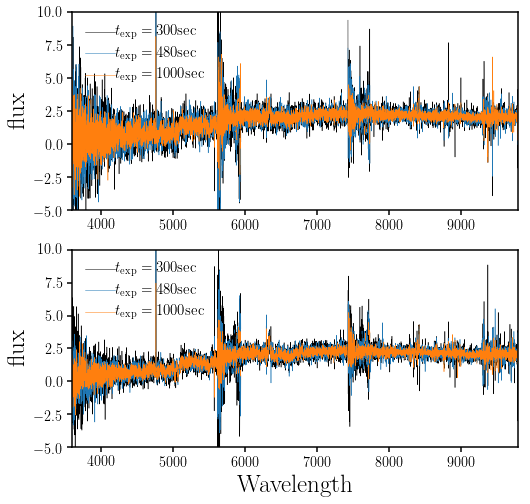

In [16]:
i_gal = 10
print brightspec_300.flux['r'][i_gal].flatten()
fig = plt.figure(figsize=(8,8))
sub = fig.add_subplot(211)
for band in band_list:
    sub.plot(brightspec_300.wave[band], brightspec_300.flux[band][i_gal].flatten(), c='k', lw=0.5,
             label='$t_\mathrm{exp}=300$sec')
    sub.plot(brightspec_480.wave[band], brightspec_480.flux[band][i_gal].flatten(), c='C0', lw=0.5,
             label='$t_\mathrm{exp}=480$sec')
    sub.plot(brightspec_1000.wave[band], brightspec_1000.flux[band][i_gal].flatten(), c='C1', lw=0.5,
             label='$t_\mathrm{exp}=1000$sec')
    if band == 'b': sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size': 15})
sub.set_xlim([3600., 9800.])
sub.set_ylabel('flux', fontsize=25)
sub.set_ylim([-5., 10])
sub = fig.add_subplot(212)
for band in band_list:
    sub.plot(darkspec_300.wave[band], darkspec_300.flux[band][i_gal].flatten(), c='k', lw=0.5, 
             label='$t_\mathrm{exp}=300$sec')
    sub.plot(darkspec_480.wave[band], darkspec_480.flux[band][i_gal].flatten(), c='C0', lw=0.5,
             label='$t_\mathrm{exp}=480$sec')
    sub.plot(darkspec_1000.wave[band], darkspec_1000.flux[band][i_gal].flatten(), c='C1', lw=0.5,
             label='$t_\mathrm{exp}=1000$sec')
    if band == 'b': sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size': 15})
sub.set_xlabel('Wavelength', fontsize=25)
sub.set_xlim([3600., 9800.])
sub.set_ylabel('flux', fontsize=25)
sub.set_ylim([-5., 10])

[-1.71079683  1.13082457  0.72840756 ...  5.14880228  1.50125062
  3.67853141]


(-5.0, 10)

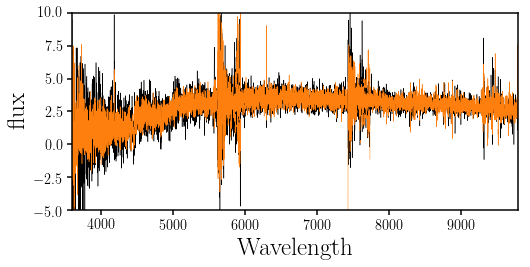

In [19]:
i_gal = 0
print brightspec_300.flux['r'][i_gal].flatten()
fig = plt.figure(figsize=(8,8))
sub = fig.add_subplot(211)
for band in band_list:
    sub.plot(brightspec_300.wave[band], brightspec_300.flux[band][i_gal].flatten(), c='k', lw=0.5,
             label='$t_\mathrm{exp}=300$sec')
    sub.plot(darkspec_300.wave[band], darkspec_300.flux[band][i_gal].flatten(), c='C1', lw=0.5, 
             label='$t_\mathrm{exp}=300$sec')
sub.set_xlabel('Wavelength', fontsize=25)
sub.set_xlim([3600., 9800.])
sub.set_ylabel('flux', fontsize=25)
sub.set_ylim([-5., 10])